<a href="https://colab.research.google.com/github/besmets/RSE_course/blob/main/RSE_Lecture_03_Plotting_NHI_and_MODVOLC_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------
# Plotting NHI hotspot and MODVOLC VRP data
------------------
**Author:** B. SMETS  
**Affiliations:** Vrije Universiteit Brussel / Royal Museum for Central Africa  
**Version:** 0.2  
**Year:** 2024  

------------------

In [2]:
# Import Python libraries
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from google.colab import files

In [4]:
# 1. LOAD GOOGLE DRIVE

drive.mount('/content/gdrive')
  # This line will ask you the permission to connect to your Google Drive. Follow the steps to grant the access.

lecture03_path = 'gdrive/My Drive/__RSE_colab_data/Lecture_03'
  # Change directory path to the one where the image frames are saved!

Mounted at /content/gdrive


In [6]:
# 2. SETUP AREA (area where you have to hard code your GIF parameters)
# ====================================================================

# 2.1. Paths to data
# -------------------

# MODVOLC DATA
mv_directory = lecture03_path
modvolc_file = 'modis_plot_data.txt'

# NHI DATA
nhi_directory = lecture03_path
nhi_file = 'NHI_data.csv'

# 2.2. Plotting parameters
# -------------------------

# Limits of date axis
start_date = '2015-01-01'     # Start date in the plot
finish_date = '2017-01-01'    # Finish date in the plot

# Plot title

plot_title = 'Erta Ale Volcano  |  Thermal Remote Sensing Observation'

# Date format to display on the plot with pre-selections
fmt1 = '%d/%m/%Y'     # e.g., 04/10/2017
fmt2 = '%d/%m/%y'     # e.g., 04/10/17
fmt3 = '%d-%m-%Y'     # e.g., 04-10-2017
fmt4 = '%b %y'        # e.g., May 19
fmt5 = '%b %Y'        # e.g., May 2019
fmt6 = '%m/%y'        # e.g., 05/19
fmt7 = '%m/%Y'        # e.g., 05/2019
fmt8 = '%d %b'        # e.g., 24 April
fmt9 = '%d/%m'        # e.g., 24/04

date_format = fmt6    # Choose the above format you would like

# =========================== END OF SETUP ===========================

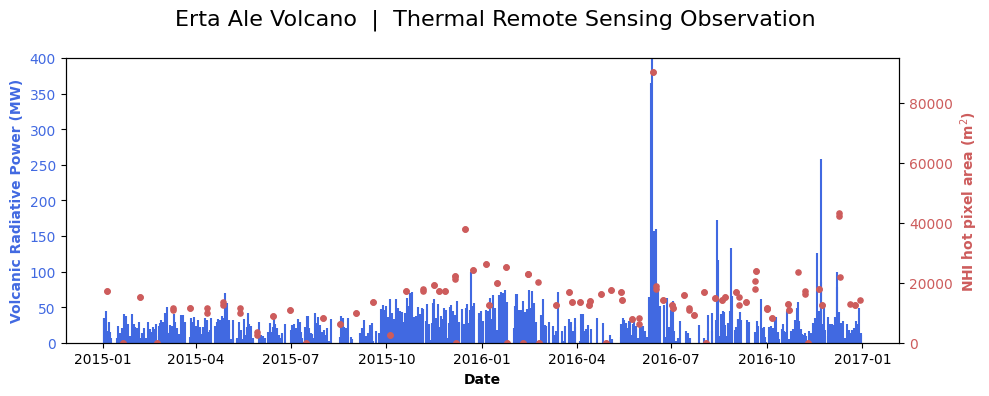

In [22]:
# 3. PLOT CREATION (you should not modify this section)
# ====================================================================

# Dataframes
modvolc = pd.read_csv(f"{mv_directory}/{modvolc_file}", sep='\s+')
nhi = pd.read_csv(f"{nhi_directory}/{nhi_file}", sep=',', thousands=',')

# Create readable 'datetime' columns to manage dates in plots
mv_rawdate = modvolc['UNIX_Time']
mv_newdate = pd.to_datetime(mv_rawdate, unit='s')

nhi_newdate = pd.to_datetime(nhi['system:time_start'], format='%b %d, %Y')

# Set the date limits
start = pd.to_datetime(start_date, yearfirst=True)
finish = pd.to_datetime(finish_date, yearfirst=True)

# Define X and Y values
x_mv = mv_newdate
y_mv = modvolc['Power']
x_nhi = nhi_newdate
y_nhi = nhi['NHI_AREA '] # Sometimes, a space is in the indexed column name

# Build the figure
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.stem(x_mv, y_mv, linefmt="royalblue", basefmt=" ", markerfmt=" ", label="MODIS")

ax2 = ax1.twinx()
ax2.scatter(x_nhi, y_nhi, c='indianred', label="S2 MSI", s=14)

# setup layout
fig.suptitle(plot_title, fontsize=16)

ax1.set_xlabel('Date', fontweight='bold')

ax1.set_ylim(bottom=0, top=400)
ax1.set_ylabel('Volcanic Radiative Power (MW)', color='royalblue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='royalblue')

ax2.set_ylim(bottom=0)
ax2.set_ylabel('NHI hot pixel area (m$^2$)', color='indianred', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='indianred')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Display the figure
plt.show()